In [398]:
#!g1.1
%reload_ext autoreload
%autoreload 2

Legal reference: https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html

In [305]:
#!g1.1
!git clone https://github.com/Just-ne-Just/dcgan.git

Cloning into 'dcgan'...


In [324]:
#!g1.1
%cd dcgan

/home/jupyter/work/resources/dcgan


In [438]:
#!g1.1
!git pull

Updating f05b108..2df589d
Fast-forward
 src/train/train.py | 2 --
 1 file changed, 2 deletions(-)


From https://github.com/Just-ne-Just/dcgan
   f05b108..2df589d  master     -> origin/master


In [249]:
#!g1.1
%pip install wandb

Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [356]:
#!g1.1
!nvidia-smi

Fri Dec 15 00:23:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  On   | 00000000:8C:00.0 Off |                    0 |
| N/A   28C    P0    22W / 250W |      5MiB / 32768MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [386]:
#!g1.1
import torch 
SEED = 42
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = False
torch.backends.cudnn.benchmark = True

In [387]:
#!g1.1
import torchvision.datasets as datasets
import torchvision.transforms as transforms

dataset = datasets.ImageFolder(root="../dataset_gan",
                           transform=transforms.Compose([
                               transforms.Resize(64),
                               transforms.CenterCrop(64),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

dataloader = torch.utils.data.DataLoader(dataset, batch_size=32,
                                         shuffle=True, num_workers=0)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [363]:
#!g1.1
from src.model.dcgan import DCGAN
from src.model.utils import weights_init

model = DCGAN(nz=100, ngf=64, nc=3, ndf=64).to(device)
model.generator.apply(weights_init)
model.discriminator.apply(weights_init)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

In [364]:
#!g1.1
import torch.optim as optim

d_opt = optim.Adam(model.discriminator.parameters(), lr=2e-4)
g_opt = optim.Adam(model.generator.parameters(), lr=2e-4)

In [315]:
#!g1.1
import wandb
wandb.login(key='30146604108f7b863edd5aa8041503fb9c0196d3')

wandb: Currently logged in as: liamstartips (wbot). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/jupyter/.netrc


True

In [ ]:
#!g1.1
from src.train.train import train

train(320, dataloader, model, g_opt, d_opt, device, log_step=50, start_step=0)

In [385]:
#!g1.1
model

DCGAN(
  (generator): Generator(
    (main): Sequential(
      (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
      (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (11): ReLU(inplace=True)
      (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), p

In [388]:
#!g1.1
import torch
import torchvision.utils as vutils

SEED = 42
torch.manual_seed(SEED)

fixed_noise = torch.randn(64, model.generator.nz, 1, 1, device=device)
with torch.no_grad():
    fake = model.generate(fixed_noise[:, :, :, :]).detach().cpu()

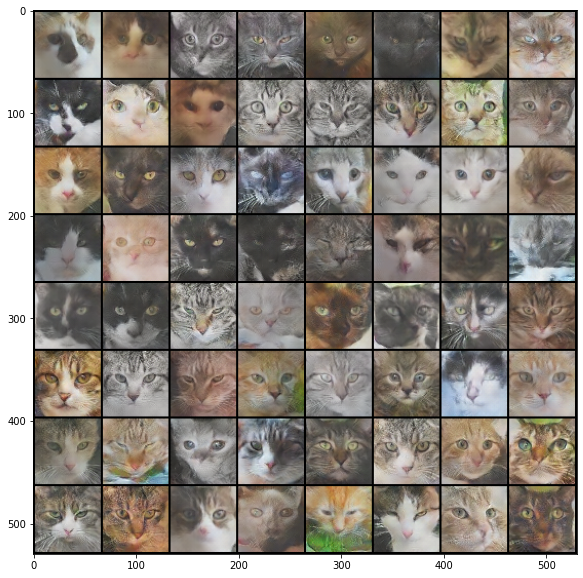

In [377]:
#!g1.1
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(10,10))
plt.imshow(np.transpose(vutils.make_grid(fake, padding=2, normalize=True) ,(1,2,0)), animated=True)

In [383]:
#!g1.1
%pip install piq

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for piq from https://files.pythonhosted.org/packages/71/49/e198c355bc01a1bb3aff5d41a8fe7c8a0502ad7a4063865d2c9dd270cb0f/piq-0.8.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 1.8 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [439]:
#!g1.1
from src.train.train import eval
from piq import FID, SSIMLoss

In [440]:
#!g1.1
fixed_noise = torch.randn(len(dataloader.dataset), model.generator.nz, 1, 1, device=device)

fid_metric = FID().to(device)
ssim_metric = SSIMLoss(data_range=1.0).to(device)
eval(model, dataloader, device, fixed_noise, fid_metric, ssim_metric)

  0%|          | 0/493 [00:00<?, ?it/s]

493 torch.Size([32, 3, 64, 64])
493 torch.Size([32, 3, 64, 64])
torch.Size([15747, 3, 64, 64]) torch.Size([15747, 3, 64, 64])


((array(291.23468766),), 0.872829258441925)

Таким образом, итоговый FID=291.2, итоговый SSIM=0.87

In [ ]:
#!g1.1
